In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.impute import SimpleImputer

## Data Exploration

In [4]:
#Import Data using Pandas into DataFrame
data=pd.read_csv("trainingData.csv")
data.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,...,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,...,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,...,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,...,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,...,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [5]:
print(data.columns)

Index(['Id', 'city', 'age', 'sex', 'social_class', 'primary_business',
       'secondary_business', 'annual_income', 'monthly_expenses',
       'old_dependents', 'young_dependents', 'home_ownership', 'type_of_house',
       'occupants_count', 'house_area', 'sanitary_availability',
       'water_availabity', 'loan_purpose', 'loan_tenure', 'loan_installments',
       'loan_amount'],
      dtype='object')


In [6]:
## Check data summary
data.describe()

,Id,age,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,loan_tenure,loan_installments,loan_amount
count,40000.00000,40000.00000,4.000000e+04,39880.000000,40000.000000,40000.00000,39621.000000,40000.000000,40000.000000,39792.000000,34747.000000,40000.000000,40000.000000,4.000000e+04
mean,20000.50000,55.15990,3.764021e+04,3810.875401,0.044900,1.13710,0.972489,26.641000,552.804750,0.686369,0.753216,12.032225,21.761175,8.412593e+03
std,11547.14972,3830.35566,2.873912e+04,4592.958009,0.222003,1.07384,0.163568,4749.995485,4596.921905,0.464028,0.255337,1.367473,16.682458,1.359694e+04
min,1.00000,2.00000,0.000000e+00,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-1.000000,-1.000000,3.000000,0.000000,1.000000e+02
25%,10000.75000,29.00000,1.440000e+04,2500.000000,0.000000,0.00000,1.000000,2.000000,200.000000,0.000000,0.500000,12.000000,12.000000,5.000000e+03
50%,20000.50000,35.00000,3.600000e+04,3500.000000,0.000000,1.00000,1.000000,3.000000,400.000000,1.000000,1.000000,12.000000,12.000000,8.000000e+03
75%,30000.25000,42.00000,5.600000e+04,4000.000000,0.000000,2.00000,1.000000,4.000000,600.000000,1.000000,1.000000,12.000000,50.000000,1.000000e+04
max,40000.00000,766105.00000,1.200000e+06,240000.000000,3.000000,7.00000,1.000000,950000.000000,700000.000000,1.000000,1.000000,84.000000,84.000000,1.343000e+06


Some observations from above :

* Minimum age is 2 and max is 766105. This seems odd. These might be ouliers and need to be removed or handled.
* Monthly Expenses has a minimum of 2 and maximum of 240000. Need to confirm if these are outlier or not
* Occupants Count has a maximum of 950000. This looks odd and looks like an outlier.
* House Area has a maximum of 700000. Needs to be validate.


In [7]:
## Check if variables have NA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 21 columns):
Id                       40000 non-null int64
city                     38136 non-null object
age                      40000 non-null int64
sex                      40000 non-null object
social_class             34745 non-null object
primary_business         39974 non-null object
secondary_business       34759 non-null object
annual_income            40000 non-null float64
monthly_expenses         39880 non-null float64
old_dependents           40000 non-null int64
young_dependents         40000 non-null int64
home_ownership           39621 non-null float64
type_of_house            39306 non-null object
occupants_count          40000 non-null int64
house_area               40000 non-null float64
sanitary_availability    39792 non-null float64
water_availabity         34747 non-null float64
loan_purpose             39974 non-null object
loan_tenure              40000 non-null int6

In [8]:
## Check if variables have missing value
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

city                     1864
social_class             5255
primary_business           26
secondary_business       5241
monthly_expenses          120
home_ownership            379
type_of_house             694
sanitary_availability     208
water_availabity         5253
loan_purpose               26
dtype: int64

We need to decide a strategy to handle the missing values. 
Either we can drop the rows if less than 5 % of total rows are having missing data or else we can fill the missing values with mean/mode/median values.
For now we park these variables aside.

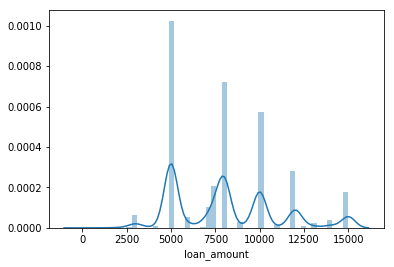

In [9]:
## lets explore loan_amount
sns.distplot(data[data['loan_amount']<=15000]['loan_amount'])

## We have limited the loan amount to 15k. The mean is  around 8.5k and 75% quantile is 10k 
## so this value should capture most of the amounts but would leave out the outliers

##Observation:
## It seems that the loan amount distribution is multimodal

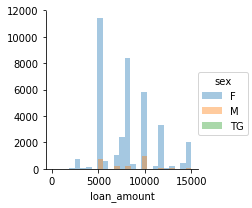

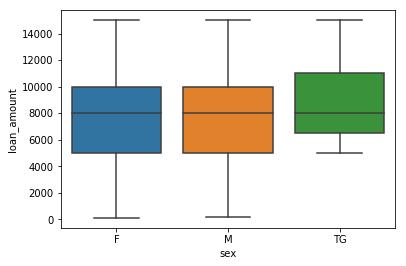

In [10]:
# Lets explore some features with respect to loan Amount
## We check if loan amount differs by Sex
sns.FacetGrid(data[data['loan_amount']<=15000],hue='sex').map(sns.distplot,'loan_amount',bins=25, kde=False).add_legend();
plt.show();
sns.boxplot(x='sex',y='loan_amount',data=data[data['loan_amount']<=15000])
plt.show();

* Interestingly, number of loans given to females is much higher than males
* Median loan amount for all the sexes is same !!

In [11]:
data['sex'].value_counts()

F     37622
M      2371
TG        7
Name: sex, dtype: int64

* As number of females are way higher than number of Males or TG. This clarifies high loans count for females

In [12]:
data[(data['loan_amount']<=15000) & (data['sex']=='M')]['loan_amount'].min()

200.0

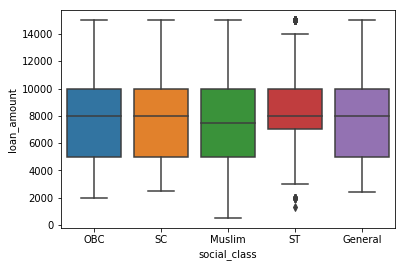

In [13]:
## We check if loan amount differs by Social Class
top_5_social_class=['OBC','SC','ST','General','Muslim'] ## we check only for top 5 social classes
sns.boxplot(x='social_class',y='loan_amount',data=data[(data['loan_amount']<=15000) & (data['social_class'].isin(top_5_social_class))])
plt.show();

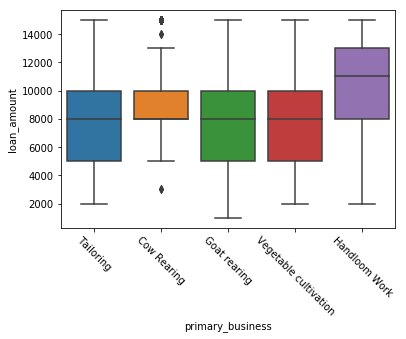

In [14]:
## We check if loan amount differs by Primary Business
top_5_primary_business=['Tailoring','Goat rearing','Cow Rearing','Handloom Work','Vegetable cultivation'] ## we check only for top 5 Primary Business
sns.boxplot(x='primary_business',y='loan_amount',data=data[(data['loan_amount']<=15000) & (data['primary_business'].isin(top_5_primary_business))])
plt.xticks(rotation=-45)
plt.show()

* We see that the median loan amount for Handloom Work is much higher than the rest of the primary businesses

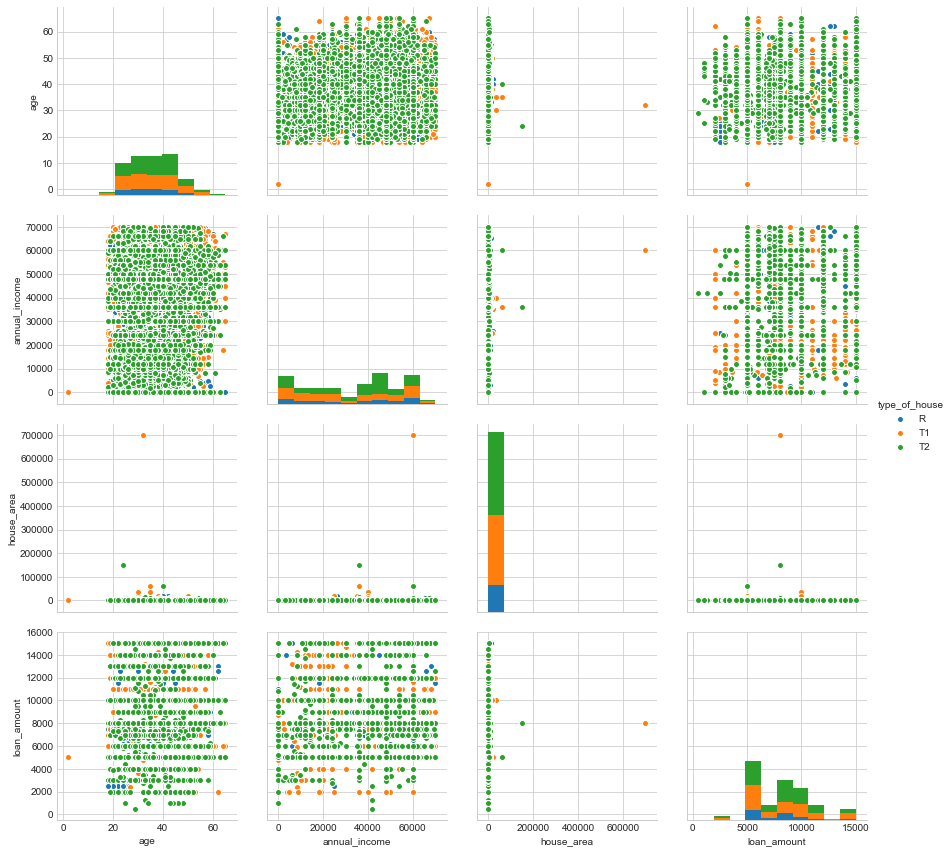

In [15]:
## Pair Plots (Scatter Plots) for age, annual income,house area
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data[(data['loan_amount']<=15000) & (data['age']<=65) & (data['annual_income']<=70000)][['age','annual_income','house_area','loan_amount','type_of_house']],hue='type_of_house' ,size=3);
plt.show()

In [16]:
data['type_of_house'].value_counts()

T2    17715
T1    15092
R      6499
Name: type_of_house, dtype: int64

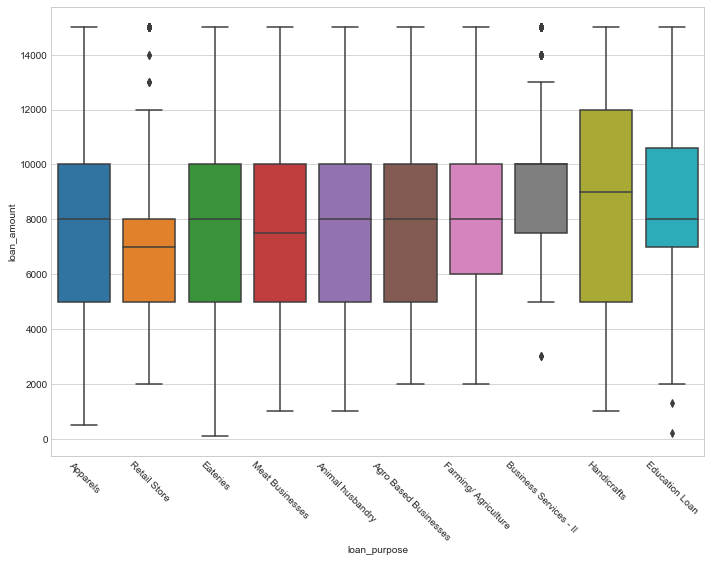

In [17]:
## We check if loan amount differs by loan purpose
top_10_loan_purpose=['Apparels','Agro Based Businesses','Animal husbandry','Meat Businesses','Handicrafts','Farming/ Agriculture','Education Loan','Retail Store','Eateries','Business Services - II'] 
## we check only for top 10 loan purpose
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x='loan_purpose',y='loan_amount',data=data[(data['loan_amount']<=15000) & (data['loan_purpose'].isin(top_10_loan_purpose))])
plt.xticks(rotation=-45)
plt.show();

In [18]:
data[(data['loan_amount']<=15000) & (data['loan_purpose']=='Business Services - II')]['loan_amount'].describe()

count      854.000000
mean      8968.384075
std       2849.200618
min       3000.000000
25%       7500.000000
50%      10000.000000
75%      10000.000000
max      15000.000000
Name: loan_amount, dtype: float64

######  Lets explore some outliers

In [19]:
## We see a value of  max age=766105.00000 and min age=2

data[(data['age']==766105.00000) | (data['age']==2)]

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
10236,10237,Kendubahara,766105,F,NaN,Dry fish selling,NaN,0.0,1000.0,0,...,1.0,T1,0,0.0,0.0,NaN,Meat Businesses,12,12,3000.0
11732,11733,Joharapuram,2,F,NaN,Beedi rolling business,NaN,0.0,6000.0,0,...,0.0,R,0,0.0,0.0,NaN,Tobacco Related Activities,12,50,5000.0
11837,11838,Biromal,2,F,NaN,Goat rearing,NaN,0.0,3000.0,0,...,1.0,T1,0,0.0,0.0,NaN,Meat Businesses,12,12,5000.0


In [20]:
## For now replace the age with mean age of females for that city
data.loc[data['age']==766105.00000,'age']=round(data[(data['age']!=766105.00000) & (data['sex']=='F') & (data['city']=='Kendubahara')]['age'].mean())
data.loc[(data['age']==2) & (data['city']=='Joharapuram'),'age']=round(data[(data['age']!=2) & (data['sex']=='F') & (data['city']=='Joharapuram')]['age'].mean())
data.loc[(data['age']==2) & (data['city']=='Biromal'),'age']=round(data[(data['age']!=2) & (data['sex']=='F') & (data['city']=='Biromal')]['age'].mean())

In [21]:
## Lets look at Occupant Count which has a max value=950000

data[data['occupants_count']==950000]

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
36986,36987,NILGIRI,34,F,OBC,Tailoring,Agriculture,60000.0,5000.0,0,...,1.0,T1,950000,300.0,1.0,1.0,Apparels,12,12,8000.0


In [22]:
## Replace the 950000 value with mean occupants for the city
data.loc[data['occupants_count']==950000,'occupants_count']=round(data[(data['occupants_count']!=950000) & (data['city']=='NILGIRI')]['occupants_count'].mean())

data[data['Id']==36987]

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
36986,36987,NILGIRI,34,F,OBC,Tailoring,Agriculture,60000.0,5000.0,0,...,1.0,T1,3,300.0,1.0,1.0,Apparels,12,12,8000.0


In [23]:
## Lets check Monthly Income

data[data['monthly_expenses']==240000]

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
23975,23976,Joynagar,22,F,General,Thread making,none,12000.0,240000.0,0,...,1.0,T1,4,340.0,1.0,0.5,Business Services - II,12,50,10000.0


In [24]:
## This looks odd. For  someone with age 22 and annual_income 12k the monthly expenses are 240k
## may be the primary business has got to do something with it.
## Lets check what's the general monthly expense of the persons with primary business as Thread Making in city Joynagar

data[(data['primary_business']=='Thread making') & (data['city']=='Joynagar')].head(10)

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
7209,7210,Joynagar,30,F,GC,Thread making,none,12000.0,6000.0,0,...,1.0,R,4,400.0,1.0,0.5,Business Services - II,12,50,5000.0
7211,7212,Joynagar,37,F,GC,Thread making,none,12000.0,5200.0,0,...,1.0,T1,5,400.0,1.0,0.5,Business Services - II,12,50,5000.0
7217,7218,Joynagar,37,F,GC,Thread making,none,12000.0,5300.0,0,...,1.0,T1,5,400.0,1.0,0.5,Business Services - II,12,50,5000.0
14327,14328,Joynagar,43,F,GC,Thread making,none,12000.0,3500.0,0,...,1.0,R,3,350.0,1.0,0.5,Business Services - II,12,50,5000.0
14329,14330,Joynagar,21,F,GC,Thread making,none,9600.0,3500.0,0,...,1.0,T1,3,350.0,1.0,0.5,Business Services - II,12,50,5000.0
14330,14331,Joynagar,38,F,GC,Thread making,none,12000.0,3000.0,0,...,1.0,T1,2,300.0,1.0,0.5,Business Services - II,12,50,5000.0
16753,16754,Joynagar,31,F,GC,Thread making,none,12000.0,3200.0,0,...,1.0,T1,6,450.0,1.0,0.5,Business Services - II,12,50,5000.0
16755,16756,Joynagar,22,F,GC,Thread making,none,12000.0,4000.0,0,...,1.0,T1,4,350.0,1.0,0.5,Business Services - II,12,50,5000.0
16756,16757,Joynagar,46,F,GC,Thread making,none,9600.0,4000.0,0,...,1.0,T1,450,450.0,1.0,0.5,Business Services - II,12,50,5000.0
16764,16765,Joynagar,27,F,GC,Thread making,none,12000.0,3500.0,0,...,1.0,T1,5,450.0,1.0,0.5,Business Services - II,12,50,5000.0


In [25]:
## From above data, we can say that the monthly expense of 240K is probably an outlier and we can replace the same with mean

data.loc[data['monthly_expenses']==240000,'monthly_expenses']=round(data[(data['monthly_expenses']!=240000) & (data['primary_business']=='Thread making') & (data['city']=='Joynagar')].mean())

In [26]:
data.describe()

,Id,age,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,loan_tenure,loan_installments,loan_amount
count,40000.00000,40000.00000,4.000000e+04,39879.000000,40000.000000,40000.00000,39621.000000,40000.000000,40000.000000,39792.000000,34747.000000,40000.000000,40000.000000,4.000000e+04
mean,20000.50000,36.00995,3.764021e+04,3804.952757,0.044900,1.13710,0.972489,2.891075,552.804750,0.686369,0.753216,12.032225,21.761175,8.412593e+03
std,11547.14972,9.05103,2.873912e+04,4438.114237,0.222003,1.07384,0.163568,9.717853,4596.921905,0.464028,0.255337,1.367473,16.682458,1.359694e+04
min,1.00000,18.00000,0.000000e+00,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-1.000000,-1.000000,3.000000,0.000000,1.000000e+02
25%,10000.75000,29.00000,1.440000e+04,2500.000000,0.000000,0.00000,1.000000,2.000000,200.000000,0.000000,0.500000,12.000000,12.000000,5.000000e+03
50%,20000.50000,35.00000,3.600000e+04,3500.000000,0.000000,1.00000,1.000000,3.000000,400.000000,1.000000,1.000000,12.000000,12.000000,8.000000e+03
75%,30000.25000,42.00000,5.600000e+04,4000.000000,0.000000,2.00000,1.000000,4.000000,600.000000,1.000000,1.000000,12.000000,50.000000,1.000000e+04
max,40000.00000,288.00000,1.200000e+06,150000.000000,3.000000,7.00000,1.000000,900.000000,700000.000000,1.000000,1.000000,84.000000,84.000000,1.343000e+06


In [27]:
## Still we see that there are quite a few outliers in the data. We will fix them.

## Occupant Count > 15 is probably a data entry error

## Lets Replace all occupant count > 15 by dividing them with 100 to get a reasonable number

data.loc[data['occupants_count']>15,'occupants_count']=round(data[data['occupants_count']>15]['occupants_count']/100)

In [28]:
## Replace age > 60 with mean value of age
data.loc[data['age']>60,'age']=round(data[data['age']<60]['age'].mean())

In [29]:
data.age.describe()

count    40000.000000
mean        35.919650
std          8.790468
min         18.000000
25%         29.000000
50%         35.000000
75%         42.000000
max         60.000000
Name: age, dtype: float64

In [30]:
data.loc[data['loan_amount']>15000,'loan_amount'].count()

211

In [31]:
## Remove loan amounts greater than 15K to remove the seemingly outlier amounts for better models
data=data.loc[(data['loan_amount']<=15000) & (data['loan_amount']>=1000),]

In [32]:
data.loan_amount.describe()

count    39786.000000
mean      8055.554718
std       2971.448473
min       1000.000000
25%       5000.000000
50%       8000.000000
75%      10000.000000
max      15000.000000
Name: loan_amount, dtype: float64

###### Handling Missing Values

In [33]:
from sklearn.impute import SimpleImputer

In [34]:
## Earlier we saw that a few columns had some missing values. Now we will deal with those columns.

## We will create new variables indicating whether an existing variable value was missing or not. 
## Then we will replace the missing value with one of Mean/Median/Mode

colums=list(data.columns[data.isnull().any()])
impute_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
impute_mode = SimpleImputer(strategy="most_frequent")

In [35]:
for cols in colums:
    ## Create new variables with missing indicator
    data[cols+'_ismissing']=np.where(data[cols].isnull(),1,0)    

In [36]:
## Separate Categorical and Numerical Features for imputing with Mode and Mean
cat_features=['city','social_class','primary_business','secondary_business','type_of_house','loan_purpose']
num_features=['monthly_expenses','home_ownership','sanitary_availability','water_availabity']

In [37]:
## Impute Mode for categorical features
data[cat_features]=impute_mode.fit_transform(data[cat_features])

In [38]:
## Impute mean for numerical features
data[num_features]=impute_mean.fit_transform(data[num_features])

In [39]:
### Lets check again whether we have any missing values 
data[null_columns].isnull().sum()

city                     0
social_class             0
primary_business         0
secondary_business       0
monthly_expenses         0
home_ownership           0
type_of_house            0
sanitary_availability    0
water_availabity         0
loan_purpose             0
dtype: int64

In [40]:
## Save our data for later use


#### Data Exploration -Revisited

In [41]:
## Correlation Matrix -for seemingly imp features
cor_features=['age','annual_income','monthly_expenses','occupants_count','house_area','loan_amount']
corr=data[cor_features].corr()
corr.style.background_gradient()

,age,annual_income,monthly_expenses,occupants_count,house_area,loan_amount
age,1,0.0618411,-0.0125923,0.0446695,0.00702092,0.0698359
annual_income,0.0618411,1,0.11086,0.360929,0.0345549,0.304688
monthly_expenses,-0.0125923,0.11086,1,0.0722028,-0.00872727,-0.0451685
occupants_count,0.0446695,0.360929,0.0722028,1,0.036457,0.216309
house_area,0.00702092,0.0345549,-0.00872727,0.036457,1,0.0168222
loan_amount,0.0698359,0.304688,-0.0451685,0.216309,0.0168222,1


* It seems that Loan Amount has no significant correlation with any of the other features

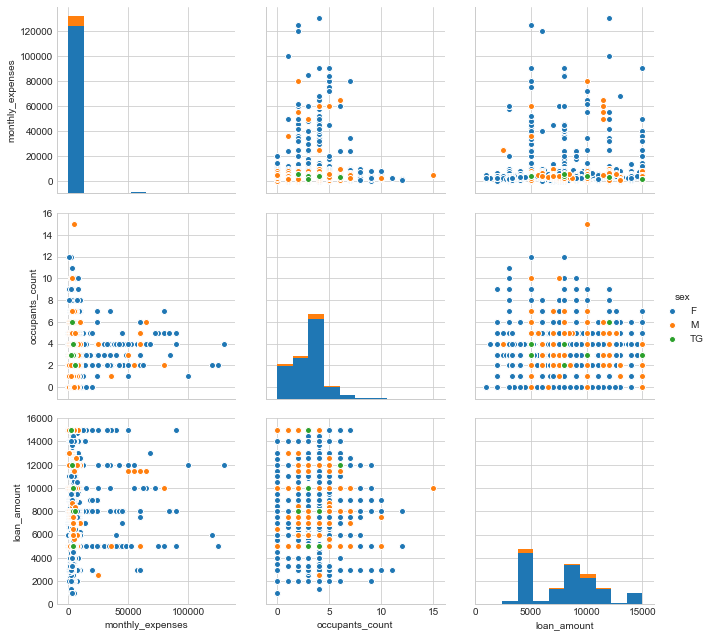

In [42]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data[['monthly_expenses','occupants_count','loan_amount','sex']],hue='sex' ,size=3);
plt.show()

In [43]:
## Create a new feature
data['income_to_expense_ratio']=(data['annual_income']/12)/(data['monthly_expenses'])

### Data Transformation for Categorical data

In [44]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [45]:
le = LabelEncoder()

In [46]:
## Convert Features with many levels into numeric labels

le.fit(list(data.loan_purpose.unique()))
data['loan_purpose']=le.transform(data.loan_purpose)
print(data.loan_purpose.head())

0     3
1     3
2     5
3     3
4    27
Name: loan_purpose, dtype: int32


In [47]:
## lets define a function to convert the rest of the columns
def cat_encoder(colm):
    le.fit(list(data[colm].unique()))
    data[colm]=le.transform(data[colm])

In [48]:
cat_colms_with_many_levels=['city','social_class','primary_business','secondary_business']

for cols in cat_colms_with_many_levels:
    cat_encoder(cols)

In [49]:
## For Columns with less levels, lets do One Hot Encoding
data=pd.get_dummies(data)

In [50]:
data.head()

,Id,city,age,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,...,sanitary_availability_ismissing,water_availabity_ismissing,loan_purpose_ismissing,income_to_expense_ratio,sex_F,sex_M,sex_TG,type_of_house_R,type_of_house_T1,type_of_house_T2
0,1,166,22,264,357,3,36000.0,5000.0,0,2,...,0,0,0,0.600000,1,0,0,1,0,0
1,2,429,21,306,357,4,94000.0,3600.0,1,1,...,0,0,0,2.175926,1,0,0,0,1,0
2,3,166,24,285,29,3,48000.0,4000.0,0,2,...,0,0,0,1.000000,0,1,0,0,1,0
3,4,580,26,306,357,4,7000.0,5000.0,0,2,...,0,0,0,0.116667,1,0,0,0,1,0
4,5,519,23,306,160,0,36000.0,3500.0,0,0,...,0,0,0,0.857143,1,0,0,0,1,0


## Model Building

* This is a regression problem as w want to predict max loan amount that can be given
* We have not seen any linear relationship as such among the features and the target variable
* We can try Regression, but Tree based models such as RF, XGBoost may perform better. We need to check and confirm.

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
## Create test and train split of data

X=data.drop(['Id','loan_amount','loan_tenure','loan_installments'],axis=1) 
## loan Tenure and Loan Installments mostly are decided after the loan amount is fixed. hence are not useful in predicting Loan amount.
Y=data[['loan_amount']]

In [53]:
 X_train, X_test, y_train, y_test = train_test_split(
 X, Y, test_size=0.10, random_state=42)

In [55]:
print(len(X_train),len(X_test))

35807 3979


###### Random Forest Model

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [57]:
## Create a Random Forest Regressor
## Lets use explained error to find  best number of estimator
rf_reg = RandomForestRegressor(random_state=0,n_estimators=100,max_depth=16,max_features='sqrt',warm_start=False)
min_est=10
max_est=200
score_mean=[]
estimator=[]
score_std_upper=[]
score_std_lower=[]
for est in range(min_est,max_est+1,10):
    rf_reg.set_params(n_estimators=est)
    scores_rfr = cross_val_score(rf_reg,X_train,y_train,cv=10,scoring='explained_variance')
    print('estimators:',est)
#     print('explained variance scores for k=10 fold validation:',scores_rfr)
    print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_rfr.mean(), scores_rfr.std() * 2))
    print('')
    score_mean.append(scores_rfr.mean())
    score_std_upper.append(scores_rfr.mean()+scores_rfr.std()*2) # for error plotting
    score_std_lower.append(scores_rfr.mean()-scores_rfr.std()*2) # for error plotting
    estimator.append(est)
    

estimators: 10
Est. explained variance: 0.61 (+/- 0.02)

estimators: 20
Est. explained variance: 0.62 (+/- 0.02)

estimators: 30
Est. explained variance: 0.63 (+/- 0.02)

estimators: 40
Est. explained variance: 0.63 (+/- 0.02)

estimators: 50
Est. explained variance: 0.63 (+/- 0.02)

estimators: 60
Est. explained variance: 0.63 (+/- 0.02)

estimators: 70
Est. explained variance: 0.63 (+/- 0.02)

estimators: 80
Est. explained variance: 0.63 (+/- 0.02)

estimators: 90
Est. explained variance: 0.63 (+/- 0.02)

estimators: 100
Est. explained variance: 0.63 (+/- 0.02)

estimators: 110
Est. explained variance: 0.63 (+/- 0.02)

estimators: 120
Est. explained variance: 0.63 (+/- 0.02)

estimators: 130
Est. explained variance: 0.63 (+/- 0.02)

estimators: 140
Est. explained variance: 0.63 (+/- 0.02)

estimators: 150
Est. explained variance: 0.63 (+/- 0.02)

estimators: 160
Est. explained variance: 0.63 (+/- 0.02)

estimators: 170
Est. explained variance: 0.63 (+/- 0.02)

estimators: 180
Est. ex

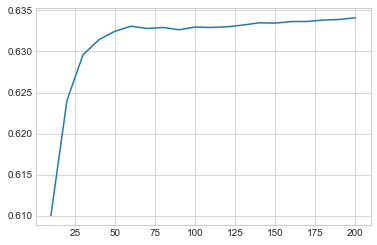

In [58]:
## Plot Estimators vs Explained Variance
plt.plot(estimator,score_mean)

In [59]:
## Best estimator
best_est=estimator[score_mean.index(max(score_mean))]

print("The best estimator is :",best_est)
print("The Max Explained Variance is :",max(score_mean))

The best estimator is : 200
The Max Explained Variance is : 0.6341126227257599


* The CV explained variance i.e. R2 is 63.4 % which is not that great for the model
* Let us check if feature selection can help improve this %

### Feature selection using Mutual Information Regression (MIR)

In [54]:
import sklearn.feature_selection as fs

In [55]:
included_features=list(X_train.columns)
mir_result = fs.mutual_info_regression(X_train, y_train) # mutual information regression feature ordering
feature_scores = []
for i in np.arange(len(included_features)):
    feature_scores.append([included_features[i],mir_result[i]])
sorted_scores = sorted(np.array(feature_scores), key=lambda s: float(s[1]), reverse=True) 
print(np.array(sorted_scores))

[['city' '0.8713101489433885']
 ['income_to_expense_ratio' '0.3970963486634238']
 ['house_area' '0.37153703716327957']
 ['primary_business' '0.36147000037654475']
 ['annual_income' '0.33969401888246953']
 ['social_class' '0.3171578691091801']
 ['water_availabity' '0.2028157411017384']
 ['occupants_count' '0.18087303002225497']
 ['loan_purpose' '0.16751092971460046']
 ['monthly_expenses' '0.14896931072432462']
 ['secondary_business_ismissing' '0.13096413634757909']
 ['social_class_ismissing' '0.13013751988116518']
 ['water_availabity_ismissing' '0.12361837502532236']
 ['sanitary_availability' '0.04291293446689437']
 ['secondary_business' '0.04152708215179857']
 ['young_dependents' '0.036482904788073256']
 ['sex_M' '0.029358241553818054']
 ['sex_F' '0.02928000171887213']
 ['type_of_house_R' '0.023428865838174495']
 ['type_of_house_T1' '0.0217783039528312']
 ['city_ismissing' '0.020922324769098388']
 ['home_ownership' '0.018768404666444027']
 ['age' '0.017901847882798805']
 ['type_of_hous

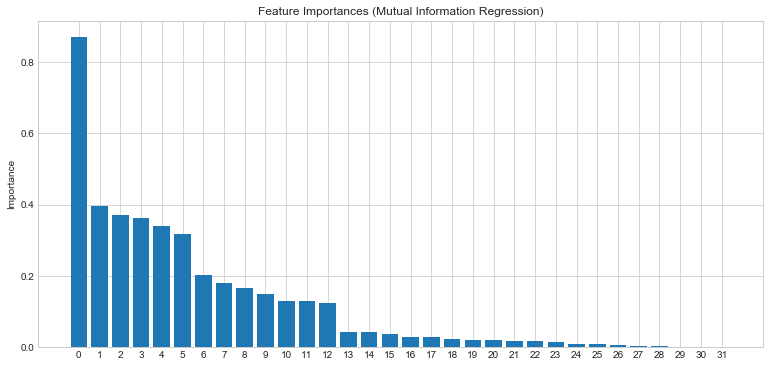

In [56]:
##Plot the results
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(111)
ind = np.arange(len(included_features))
plt.bar(ind,[float(i) for i in np.array(sorted_scores)[:,1]])
ax.axes.set_xticks(ind)
plt.title('Feature Importances (Mutual Information Regression)')
plt.ylabel('Importance')
plt.show()

It seems that City,income_to_expense_ratio,primary_business,house_area,annual_income etc are some of the most important features. This seems a reasonable result to obtain.

Now let us train the model on top features selected by MIR

In [57]:
top_features=list(np.array(sorted_scores)[:,0][:15]) ## Select Top 15 features
X_train_top_feat=X_train[top_features]

In [99]:
## Create a Random Forest Regressor
## Lets use explained error to find  best number of estimator
rf_reg = RandomForestRegressor(random_state=0,n_estimators=100,max_depth=16,max_features='sqrt',warm_start=False)
min_est=10
max_est=200
score_mean=[]
estimator=[]
score_std_upper=[]
score_std_lower=[]
for est in range(min_est,max_est+1,5):
    rf_reg.set_params(n_estimators=est)
    scores_rfr = cross_val_score(rf_reg,X_train_top_feat,y_train,cv=5,scoring='explained_variance')
    score_mean.append(scores_rfr.mean())
    score_std_upper.append(scores_rfr.mean()+scores_rfr.std()*2) # for error plotting
    score_std_lower.append(scores_rfr.mean()-scores_rfr.std()*2) # for error plotting
    estimator.append(est)
    

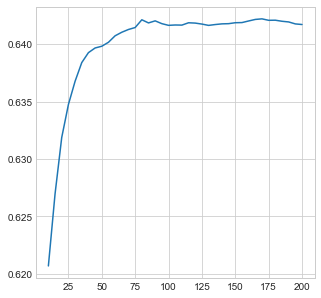

In [100]:
## Plot Estimators vs Explained Variance
plt.plot(estimator,score_mean)

In [101]:
## Best estimator using MIS features
best_est=estimator[score_mean.index(max(score_mean))]

print("The best estimator is :",best_est)
print("The Max Explained Variance is :",max(score_mean))

The best estimator is : 170
The Max Explained Variance is : 0.6421959780777476


* It seems that our feature selection did not have any significant impact n the R2
* Let's use the above parameters to fit our final model and check test error

In [102]:
# lets fit the model with the best estimator that we got !!
rf_reg.set_params(n_estimators=best_est)
rf_reg.fit(X_train_top_feat,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=170, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

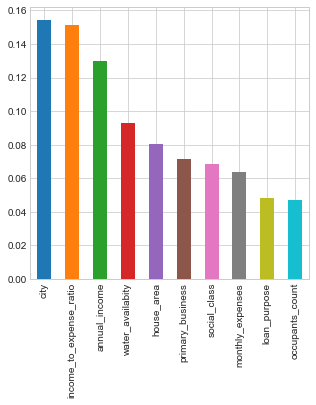

In [103]:
## Plot Feature Importance
## Plot Top 10 Features
feat_importances = pd.Series(rf_reg.feature_importances_, index=X_train_top_feat.columns)
feat_importances.nlargest(10).plot(kind='bar')

* City is top feature and our engineered feature,income to expense ratio, comes up as the 2nd top feature.Loan Purpose also features as one of the imp features.

In [104]:
# Fit model on test data and check error

y_test_predict=rf_reg.predict(X_test[top_features])

In [89]:
## R2 of Test data
rf_reg.score(X_test[top_features],y_test)

0.6490386697838577

In [105]:
from sklearn.metrics import mean_squared_error

In [106]:
## RMSE of test predictions
np.sqrt(mean_squared_error(y_test,y_test_predict))

1740.2259232218603

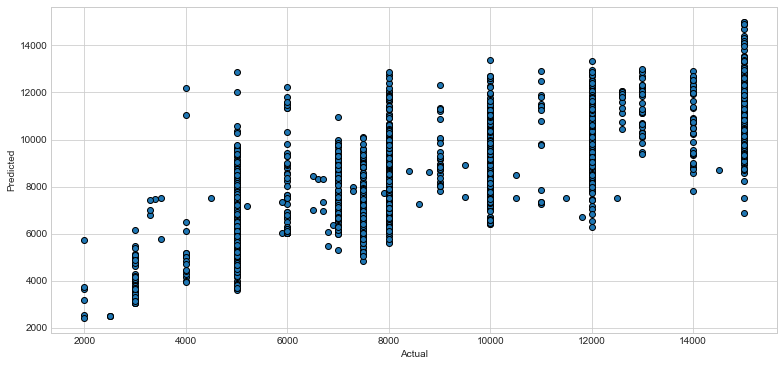

In [120]:
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(111)
plt.scatter(y_test,y_test_predict,edgecolors=(0, 0, 0))
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

* So our RF Regressor Model is performing okiesh. Lets try out a boosting model now !!

In [233]:
import xgboost as xgb

In [122]:
## Create a data matrix which we will use later in CV
data_dmatrix = xgb.DMatrix(data=X_train_top_feat,label=y_train)

In [123]:
## Create XG Boost Model
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.7, learning_rate = 0.1,
                max_depth = 8, alpha = 10, n_estimators = 300)

In [124]:
## Fit and Predict on Test Data
xg_reg.fit(X_train_top_feat,y_train)

preds = xg_reg.predict(X_test[top_features])

In [125]:
## Find Test RMSE
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 1611.777124


In [ ]:
## Plot Imp Features
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [ ]:
## CV using XGBoost

params = {"objective":"reg:linear",'colsample_bytree': 0.5,'learning_rate': 0.9,
                'max_depth': 5, 'alpha': 10,'subsample':0.6}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=300,early_stopping_rounds=50,metrics="rmse", as_pandas=True, seed=123)

In [128]:
cv_results.tail()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
48,1737.542798,14.062481,1953.201172,18.652317
49,1733.509595,14.317371,1952.035596,19.423191
50,1728.621313,16.060733,1949.861670,17.593462
51,1725.416601,15.879137,1950.691846,17.078203
52,1721.053735,15.401400,1949.176587,18.771943


In [144]:
## Try GridSearch to search for better parameters
from sklearn.model_selection import GridSearchCV   #Perforing grid search

param_test1 = {
 'max_depth':range(3,10,2),'n_estimators':range(10,200,10),
 'min_child_weight':range(1,6,2),'learning_rate':[x / 10.0 for x in range(1, 10, 1)]
}
gsearch1 = GridSearchCV(estimator = xgb.XGBRegressor( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='explained_variance',iid=False, cv=5)
gsearch1.fit(X_train_top_feat,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=140,
       n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'max_depth': range(3, 10, 2), 'n_estimators': range(10, 200, 10), 'min_child_weight': range(1, 6, 2), 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='explained_variance', verbose=0)

In [145]:
gsearch1.best_params_, gsearch1.best_score_

({'learning_rate': 0.1,
  'max_depth': 9,
  'min_child_weight': 5,
  'n_estimators': 190},
 0.6874505856000863)

In [146]:
# Fit XGBoost using Best searched Parameters

xg_reg_gs = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.8, learning_rate = 0.1,
                max_depth = 9, n_estimators = 190,min_child_weight=1,subsample=0.8)


In [147]:
## Fit and Predict on Test Data
xg_reg_gs.fit(X_train_top_feat,y_train)

preds = xg_reg_gs.predict(X_test[top_features])

In [148]:
## Find Test RMSE
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 1596.451076


In [149]:
## R2 of Test data
rf_reg.score(X_test[top_features],preds)

0.9203453494755351

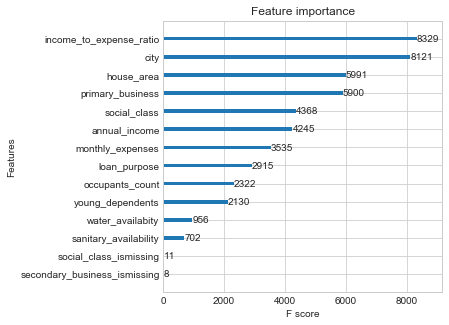

In [150]:
## Plot Imp Features
xgb.plot_importance(xg_reg_gs)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

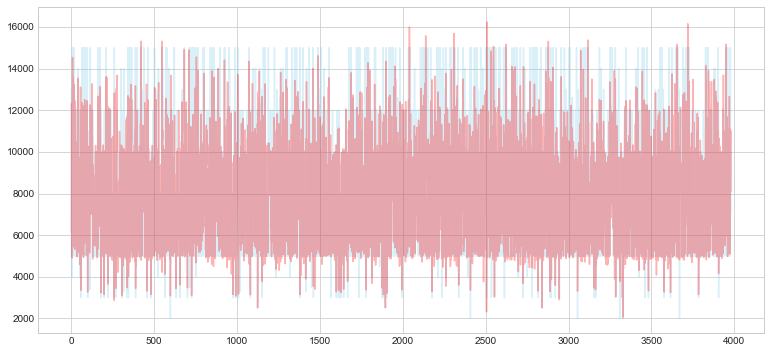

In [165]:
## Actual vs Predicted Plot
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(111)
plt.plot(range(1,len(y_test)+1),y_test,color='skyblue',alpha=0.3)
plt.plot(range(1,len(y_test)+1),preds,color='red',alpha=0.3)
#ax.set_xlabel('Actual')
#ax.set_ylabel('Predicted')
plt.show()

## Conclusion

* XGBoost with Gridsearch gave us a better model with Test RMSE of 1596 and Our RF model gave us Test RMSE of 1740. Considering that XGBoost is better than RF and is able to explain 92% of variance in our data, I would suggest to go with XGBoost Model. Although, It might be difficult to explain predictions for XGBoost Model using tree interpreter.

## Implement Linear Regression using Gradient Descent from Scratch

In [166]:
## We create a class to  run LR using SGD.
## This is just a basic implementation. I am doing this for the first time 
## and It would require some help from Google and Stackoverflow. I suppose this will be fun to do.

In [167]:
from sklearn.preprocessing import StandardScaler

In [226]:
## Define our class

class LinearRegressionSGD(object):
    
    def __init__(self,learning_rate=0.1,epochs=50):
        
        ## Initialise variables
        self.learning_rate=learning_rate
        self.epochs=epochs
        self.error=np.zeros(epochs)
    
    def fit(self,X,y):
        
        X=np.insert(X,0,1,axis=1) ## Add bias term
        self.w=np.random.randn(X.shape[1]) ## Initialise weights
        self.m=len(y)
        
        
        for i in range(self.epochs):
            #print("Y shape",y.shape)
            #print("X Shape",X.shape)
            #print("W shape",self.w.shape)
            
            output=X.dot(self.w)
            #print("output shape",output.shape)
            err=np.subtract(output.T,y)
            #print("error shape",err.shape)
            if i%200==0:
                
                print("Error Square:",np.sum(np.square(err))/(2*self.m))
            
            gradient=X.T.dot(err)/self.m ## Calclulate gradient
            #print("gradient shape",gradient.shape)
            gradient_lr=np.sum(np.multiply(self.learning_rate,gradient))
            self.w=np.subtract(self.w,gradient_lr) ## Update weight
            #print("Gradient update done")
            #print("w shape",self.w.shape)
            self.error[i]=np.sqrt(np.sum(np.square(err)))/(2*self.m) ## Calc RMSE
        return self
            
    def predict(self,X_test):
        return np.insert(X_test, 0, 1, axis=1).dot(self.w)

In [231]:
## We take Sample of data as taking full data causes some memory issues
X_n=np.matrix(X_train_top_feat.iloc[0:5000,].values)
y_n=np.matrix(y_train.iloc[0:5000,].values)
scale=StandardScaler()
scale.fit(X_n)
X_n_scale=scale.transform(X_n)

In [228]:
X_n_scale.shape

(5000, 15)

In [229]:
regr = LinearRegressionSGD(learning_rate=0.00000001,epochs=2000).fit(X_n_scale,y_n)

Error Square: 183433991103.81238
Error Square: 180255623029.48785
Error Square: 177678908397.6085
Error Square: 175686572930.01746
Error Square: 174261737749.31467
Error Square: 173387911018.45984
Error Square: 173048979751.21274
Error Square: 173229201789.96387
Error Square: 173913197947.59872
Error Square: 175085944310.09442


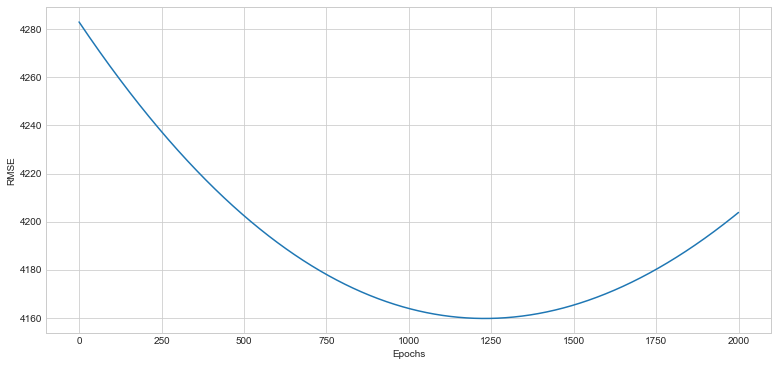

In [230]:
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(111)
plt.plot(regr.error)
ax.set_xlabel('Epochs')
ax.set_ylabel('RMSE')
plt.show()

* We have implemented basic version of gradient descent. We can improve this further by using batch gradient update.Also we can update bias term using gradient descent for better convergence.